In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [6]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [7]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
ST_Slope = pd.get_dummies(df['ST_Slope'],drop_first=True)
ExerciseAngina = pd.get_dummies(df['ExerciseAngina'],drop_first=True)
RestingECG = pd.get_dummies(df['RestingECG'],drop_first=True)
ChestPainType = pd.get_dummies(df['ChestPainType'],drop_first=True)

In [8]:
dataset = pd.concat([df,sex,ST_Slope,ExerciseAngina,RestingECG,ChestPainType],axis=1)

In [9]:
dataset = dataset.drop(["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],axis=1)

In [10]:
dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,Flat,Up,Y,Normal,ST,ATA,NAP,TA
0,40,140,289,0,172,0.0,0,True,False,True,False,True,False,True,False,False
1,49,160,180,0,156,1.0,1,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,False,True,False,False,True,True,False,False
3,48,138,214,0,108,1.5,1,False,True,False,True,True,False,False,False,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,True,False,False,True,False,False,False,True
914,68,144,193,1,141,3.4,1,True,True,False,False,True,False,False,False,False
915,57,130,131,0,115,1.2,1,True,True,False,True,True,False,False,False,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,True,False,False


In [11]:
dataset.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'M', 'Flat', 'Up', 'Y', 'Normal', 'ST', 'ATA', 'NAP',
       'TA'],
      dtype='object')

In [12]:
X = dataset.drop('HeartDisease',axis=1)
Y = dataset['HeartDisease']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[ 1.75354017,  0.40398537, -1.85006457, ..., -0.49616526,
        -0.53218116, -0.22710335],
       [-0.81787111, -0.95050604, -1.85006457, ..., -0.49616526,
        -0.53218116, -0.22710335],
       [ 1.21782949,  1.48757849,  1.49894114, ..., -0.49616526,
         1.87905939, -0.22710335],
       ...,
       [ 0.3606924 , -0.24617051,  0.9686819 , ..., -0.49616526,
        -0.53218116, -0.22710335],
       [ 1.11068735,  0.07890743,  0.6895981 , ..., -0.49616526,
        -0.53218116, -0.22710335],
       [-0.71072897, -1.32976364,  0.41051429, ..., -0.49616526,
         1.87905939, -0.22710335]])

In [18]:
X_test

array([[ 0.14640812, -0.95050604, -1.85006457, ..., -0.49616526,
        -0.53218116, -0.22710335],
       [ 1.32497163, -0.67960776,  0.95937911, ..., -0.49616526,
        -0.53218116, -0.22710335],
       [-0.28216042, -1.22140432, -1.85006457, ..., -0.49616526,
        -0.53218116, -0.22710335],
       ...,
       [-0.17501829, -1.11304501,  0.28957797, ..., -0.49616526,
        -0.53218116, -0.22710335],
       [-1.78215034, -0.1378112 ,  0.78262603, ...,  2.01545751,
        -0.53218116, -0.22710335],
       [-0.06787615,  1.48757849, -1.85006457, ..., -0.49616526,
         1.87905939, -0.22710335]])

In [19]:
# %pip install tensorflow

In [20]:
# Part 2 - Now Let's make the ANN!
# Importing the Keras Librabies and Packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [21]:
# Initializing the ANN
classifier = Sequential()

# Adding the Input layer and the First Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X_train.shape[1]))

# Adding the Second Hidden Layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs = 10)

Epoch 1/10
50/50 [==============================] - 0s 6ms/step - loss: 0.2187 - accuracy: 0.9206 - val_loss: 0.3877 - val_accuracy: 0.8642
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9185 - val_loss: 0.3880 - val_accuracy: 0.8683
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9206 - val_loss: 0.3881 - val_accuracy: 0.8642
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9206 - val_loss: 0.3895 - val_accuracy: 0.8601
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9185 - val_loss: 0.3895 - val_accuracy: 0.8642
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9246 - val_loss: 0.3889 - val_accuracy: 0.8683
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.2152 - accuracy: 0.9206 - val_loss: 0.3902 - val_accuracy: 0.8683
Epoch 8/10
50/50 [==

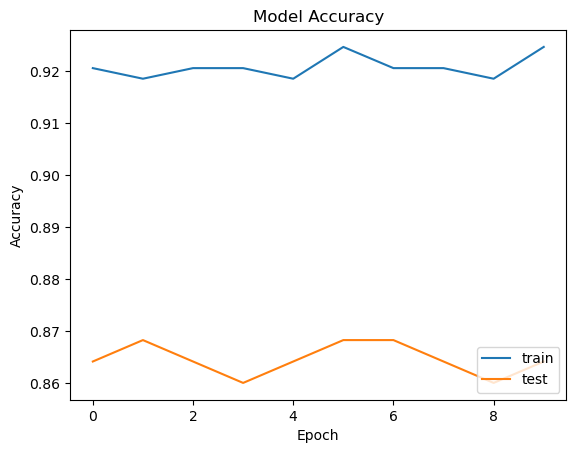

In [28]:
# Summarize History for Accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'],loc='lower right')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [29]:
# Part 3 : Making Predictions and Evaluating the Model

# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

6/6 [==============================] - 0s 2ms/step


0.8532608695652174

In [30]:
import pickle
file = open('this_is_it.pkl','wb')
pickle.dump(classifier, file)

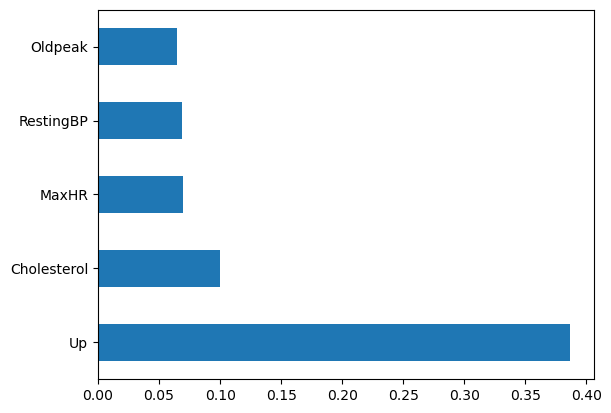

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

## GRAPH FOR FEATURE IMPORTANCE
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

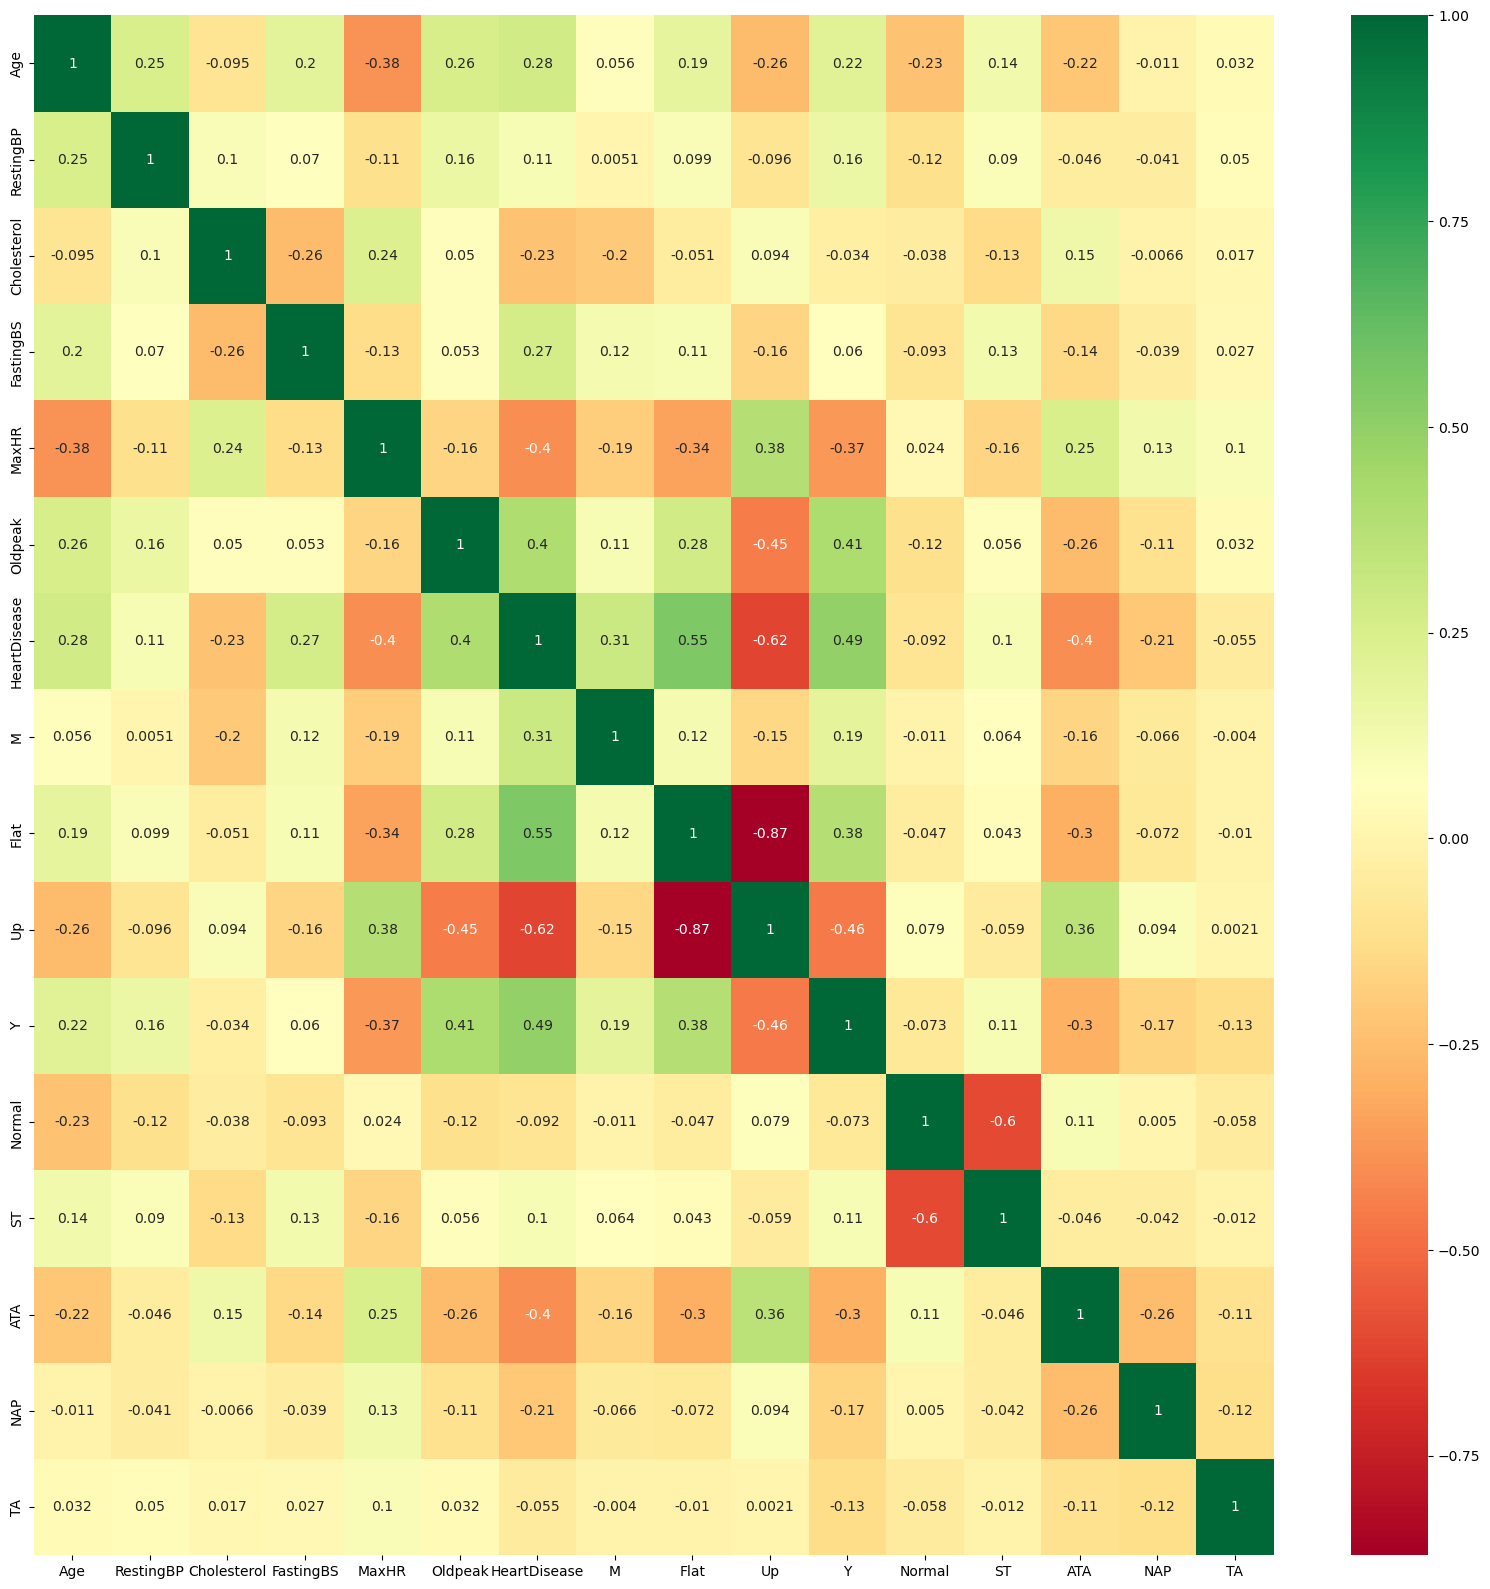

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

